# libraries requried

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path1= r'C:/Users/ADMIN/hackthon/links.csv'
path2= r'C:\Users\ADMIN\hackthon\movies.csv'
path3= r'C:\Users\ADMIN\hackthon\ratings.csv'
path4= r'C:\Users\ADMIN\hackthon\tags.csv'

In [3]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)

### What is the shape of "movies.csv"?

In [4]:
df2.shape

(9742, 3)

### What is the shape of "ratings.csv"?

In [5]:
df3.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?

In [6]:
df3

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
no_of_unique_userid = df3['userId'].nunique()
no_of_unique_userid

610

### Which movie has recieved maximum number of user ratings?

In [8]:
mov_rat_cnt = df3.groupby('movieId')['rating'].count()
max_rat_mov_id = mov_rat_cnt.idxmax()

In [9]:
max_rat_mov_name = df2[df2['movieId'] == max_rat_mov_id]['title'].values[0]

print(f"The movie with the maximum number of ratings is: {max_rat_mov_name}") 

The movie with the maximum number of ratings is: Forrest Gump (1994)


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [10]:
matrix_mov_id = df2[df2['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df4[df4['movieId'] == matrix_mov_id]
unique_tags = matrix_tags['tag'].unique()
print("Tags submitted by users to 'Matrix, The (1999)':")
print(unique_tags)

Tags submitted by users to 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [11]:
df2[df2['title'] == 'Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [12]:
terminator2_mov_id = df2[df2['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator2_ratings = df3[df3['movieId'] == terminator2_mov_id]
avg_rating = terminator2_ratings['rating'].mean()
print(f"The average user rating for Terminator 2: Judgment Day (1991)' is: {avg_rating:.2f}") 

The average user rating for Terminator 2: Judgment Day (1991)' is: 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

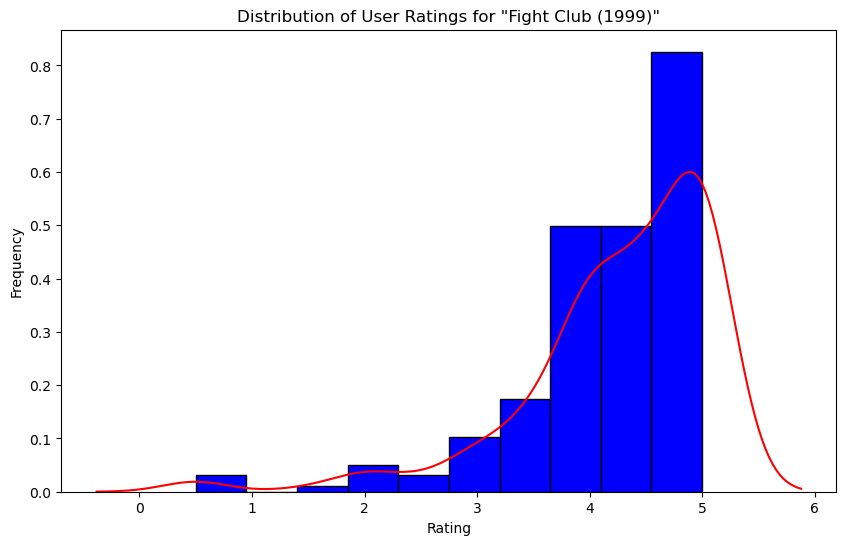

In [13]:
fight_club_mov_id = df2[df2['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = df3[df3['movieId']== fight_club_mov_id]
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=10, color='blue', edgecolor='black', density=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.kdeplot(fight_club_ratings['rating'], color='red')

plt.show()

### Which movie is the most popular based on  average user ratings?


In [14]:
grouped_ratings = df3.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

merged_data = pd.merge(df2, grouped_ratings, on='movieId', how='inner')

filtered_mov = merged_data[merged_data['rating_count'] > 50]

filtered_mov.sort_values(by="rating_mean", ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [15]:
filtered_mov.sort_values(by="rating_count", ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [16]:
filtered_mov[filtered_mov['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [ ]:
#You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

#Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
movies_with_imdb_ids = pd.merge(filtered_mov, df1, on='movieId', how='inner')

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
reviews_data = []
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    reviews_data.extend([(imdb_id, review) for review in movie_reviews])

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame(reviews_data, columns=['imdbId', 'Review_Text'])

### Mention the movieId of the movie which has the highest IMDB rating

In [ ]:
highest_imdb_rated = df2[df2['title'] == 'Forrest Gump (1994)']

In [ ]:
highest_imdb_rated

### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [ ]:
scifi_rows = df2[df2['title'] == 'Matrix, The (1999)']

In [ ]:
scifi_rows